In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

font = r'/home/brltt/Documents/PythonNotes/DADOS/MICRODADOS_ENEM_2019.csv'
renda_ordenada = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q']
colunas = ['Q025','Q006','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_MT','NU_NOTA_LC','NU_NOTA_REDACAO']
provas = ['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_MT','NU_NOTA_LC','NU_NOTA_REDACAO']

chunksize = 10 ** 4
chunks = []
dados_total = pd.DataFrame()

for chunk in pd.read_csv(font, chunksize=chunksize, encoding='latin9', usecols=colunas, sep=';'):
    chunks.append(chunk)

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [ ]:
chunks[1]

In [ ]:
dados_total = pd.concat(chunks)
del chunks

In [ ]:
dados_total['NU_NOTA_TOTAL'] = dados_total[provas].sum(axis=1)
plt.figure(figsize=(10,8))
sns.boxplot(x="Q006", y="NU_NOTA_TOTAL", data=dados_total, order=renda_ordenada)
plt.title("Boxplot das notas totais sem zero pela renda")

In [ ]:
dados_total

In [ ]:
sns.displot(dados_total, x="NU_NOTA_TOTAL")

In [ ]:
dados_sem_nota_zero = dados_total.query("NU_NOTA_TOTAL != 0")
plt.figure(figsize=(10,8))
sns.boxplot(x="Q006", y="NU_NOTA_TOTAL", hue="Q025", data=dados_sem_nota_zero, order=renda_ordenada)
plt.title("Boxplot das notas totais sem zero pela renda")

In [ ]:
def plot_seaborn(x_axis, y_axis, plot_data, plot_order, plot_hue, plot_title):
    plt.figure(figsize=(10,8))
    sns.boxplot(x=x_axis, y=y_axis, data=plot_data, hue=plot_hue, order=plot_order)
    plt.title(plot_title)

In [ ]:
plot_seaborn("Q006", "NU_NOTA_TOTAL", dados_sem_nota_zero, renda_ordenada, "Q025", 0)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

font = r'/home/brltt/Documents/PythonNotes/DADOS/MICRODADOS_ENEM_2019.csv'
renda_ordenada = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q']
colunas = ['Q006', 'IN_TREINEIRO', 'SG_UF_RESIDENCIA']

chunksize = 10 ** 4
chunks = []
dados_total = pd.DataFrame()

for chunk in pd.read_csv(font, chunksize=chunksize, encoding='latin9', usecols=colunas, sep=';'):
    chunks.append(chunk)

dados_total = pd.concat(chunks)
del chunks


In [ ]:
rendas = (dados_total.groupby('Q006')['IN_TREINEIRO'].value_counts(normalize=True).rename("Proporcao").mul(100).reset_index())
rendas = rendas.rename(columns={'IN_TREINEIRO': 'Treineiro', 'Q006' : 'Renda'})
rendas = rendas.replace(0, 'Nao')
rendas = rendas.replace(1, 'Sim')
rendas



In [ ]:
plt.figure(figsize=(10,8))
ax = sns.barplot(x="Renda", y="Proporcao", hue="Treineiro", data=rendas, order=renda_ordenada)
ax.set_title("Proporcao de treineiros e nao-treineiros por renda")
ax.set_ylabel("Proporcao (%)")
ax.set_xlabel("Grupo de renda familiar")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

font = r'/home/brltt/Documents/PythonNotes/DADOS/MICRODADOS_ENEM_2019.csv'
renda_ordenada = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q']
colunas = ['TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_MT', 'TX_RESPOSTAS_LC', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_MT', 'TP_PRESENCA_LC', 'NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_MT','NU_NOTA_LC','NU_NOTA_REDACAO']
provas = ['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_MT','NU_NOTA_LC','NU_NOTA_REDACAO']

chunksize = 10 ** 4
chunks = []
dados_total = pd.DataFrame()

for chunk in pd.read_csv(font, chunksize=chunksize, encoding='latin9', usecols=colunas, sep=';'):
    chunks.append(chunk)
    

dados_total = pd.concat(chunks)
del chunks
dados_total['NU_NOTA_TOTAL'] = dados_total[provas].sum(axis=1)

In [ ]:
somente_zeros = dados_total.query('NU_NOTA_TOTAL == 0')
#[['TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_MT', 'TP_PRESENCA_LC']]
somente_zeros

In [ ]:
faltantes = somente_zeros.query('((TP_PRESENCA_CN == 0) | (TP_PRESENCA_CH == 0) |  (TP_PRESENCA_MT == 0) | (TP_PRESENCA_LC == 0)) & (NU_NOTA_CN == 0)')
faltantes

In [ ]:
eliminados = somente_zeros.query('(TP_PRESENCA_CN == 2) | (TP_PRESENCA_CH == 2) |  (TP_PRESENCA_MT == 2) | (TP_PRESENCA_LC == 2)')
eliminados

In [ ]:
presentes = somente_zeros.query('(TP_PRESENCA_CN == 1) & (TP_PRESENCA_CH == 1) &  (TP_PRESENCA_MT == 1) & (TP_PRESENCA_LC == 1)')
presentes

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

font = r'/home/brltt/Documents/PythonNotes/DADOS/MICRODADOS_ENEM_2019.csv'
colunas = ['SG_UF_RESIDENCIA', 'NU_IDADE']

chunksize = 10 ** 4
chunks = []
dados_total = pd.DataFrame()

for chunk in pd.read_csv(font, chunksize=chunksize, encoding='latin9', usecols=colunas, sep=';'):
    chunks.append(chunk)
    

dados_total = pd.concat(chunks)
del chunks

In [ ]:
dados_total.query("NU_IDADE <= 14")["SG_UF_RESIDENCIA"].value_counts(normalize=True)

In [ ]:
alunos_menor_quatorze = dados_total.query("NU_IDADE < 15")
alunos_menor_quatorze["SG_UF_RESIDENCIA"].value_counts(normalize=True).plot.bar(figsize=(10,8))

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

font = r'/home/brltt/Documents/PythonNotes/DADOS/MICRODADOS_ENEM_2019.csv'
colunas = ['SG_UF_RESIDENCIA', 'NU_IDADE', 'NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_MT','NU_NOTA_LC','NU_NOTA_REDACAO', 'TP_LINGUA']
provas = ['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_MT','NU_NOTA_LC','NU_NOTA_REDACAO']
chunksize = 10 ** 4
chunks = []
dados_total = pd.DataFrame()

for chunk in pd.read_csv(font, chunksize=chunksize, encoding='latin9', usecols=colunas, sep=';'):
    chunks.append(chunk)
    

dados_total = pd.concat(chunks)
del chunks

dados_total['NU_NOTA_TOTAL'] = dados_total[provas].sum(axis=1)

<AxesSubplot:>

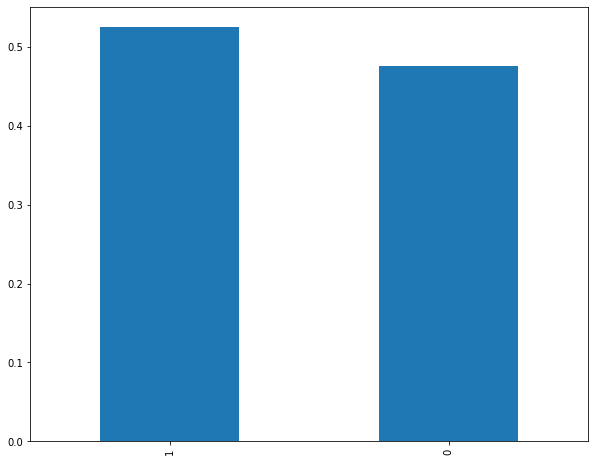

In [9]:
dados_total["TP_LINGUA"].value_counts(normalize=True).plot.bar(figsize=(10,8))

In [10]:
ingles = dados_total.query("TP_LINGUA == 0")["NU_NOTA_LC"]
ingles=ingles.dropna(axis=0,how='all')
ingles

0          497.3
2          582.6
7          395.6
10         549.7
16         488.7
           ...  
5095255    547.0
5095258    499.6
5095261    506.7
5095263    515.7
5095268    493.1
Name: NU_NOTA_LC, Length: 1935195, dtype: float64

In [11]:
espanhol = dados_total.query("TP_LINGUA == 1")["NU_NOTA_LC"]
espanhol=espanhol.dropna(axis=0,how='all')
espanhol

1          482.3
5          582.0
6          464.3
8          354.2
9          515.3
           ...  
5095256    446.9
5095257    543.3
5095259    510.5
5095262    599.3
5095269    473.2
Name: NU_NOTA_LC, Length: 1987950, dtype: float64

In [12]:
data_to_plot = [ingles, espanhol]
data_to_plot

[0          497.3
 2          582.6
 7          395.6
 10         549.7
 16         488.7
            ...  
 5095255    547.0
 5095258    499.6
 5095261    506.7
 5095263    515.7
 5095268    493.1
 Name: NU_NOTA_LC, Length: 1935195, dtype: float64,
 1          482.3
 5          582.0
 6          464.3
 8          354.2
 9          515.3
            ...  
 5095256    446.9
 5095257    543.3
 5095259    510.5
 5095262    599.3
 5095269    473.2
 Name: NU_NOTA_LC, Length: 1987950, dtype: float64]

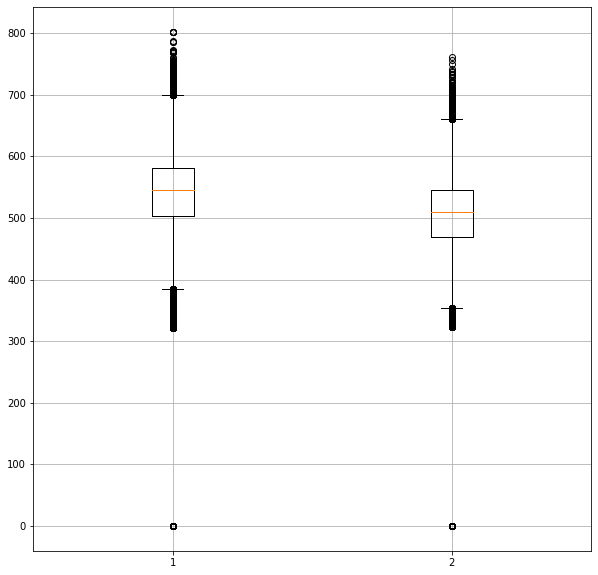

In [13]:
fig = plt.figure(figsize =(10, 10)) 
ax = fig.add_subplot(1,1,1)
ax.grid(True)
bp = ax.boxplot(data_to_plot)